## Goal
The goal here is to evaluate whether a pricing test running on the site has been successful. As always, you should focus on user segmentation and provide insights about segments who behave differently as well as any other insights you might find.


## Challenge Description

Company XYZ sells a software for $39. Since the revenue has been flat for some time, the VP of Product has decided to run a test increasing the price. She hopes that this would increase revenue.

In the experiment:
- 66% of the users saw the old price of \$39.
- A random sample of 33% of users saw a higher price of \$59.

The test has been running for some time, and the VP of Product is interested in understanding the results and determining if it would make sense to increase the price for all users.

**Questions:**

1. Should the company sell its software for $39 or $59?
2. The VP of Product is interested in having a holistic view of user behavior, especially focusing on actionable insights that might increase the conversion rate. What are your main findings looking at the data?
3. [Bonus] The VP of Product feels that the test has been running for too long and that they should have achieved statistically significant results in a shorter time. Do you agree with this statement? If so, after how many days would you have stopped the test? Please explain your reasoning.


In [53]:
import pandas as pd

# Load the data
user_data = pd.read_csv('./Pricing_Test/user_table.csv')

# Show the first few rows
user_data.head()

,user_id,city,country,lat,long
0,510335,Peabody,USA,42.53,-70.97
1,89568,Reno,USA,39.54,-119.82
2,434134,Rialto,USA,34.11,-117.39
3,289769,Carson City,USA,39.15,-119.74
4,939586,Chicago,USA,41.84,-87.68


In [54]:
# Load the test results data
test_results = pd.read_csv('./Pricing_Test/test_results.csv')

# Show the first few rows
test_results.head()

,user_id,timestamp,source,device,operative_system,test,price,converted
0,604839,2015-05-08 03:38:34,ads_facebook,mobile,iOS,0,39,0
1,624057,2015-05-10 21:08:46,seo-google,mobile,android,0,39,0
2,317970,2015-04-04 15:01:23,ads-bing,mobile,android,0,39,0
3,685636,2015-05-07 07:26:01,direct_traffic,mobile,iOS,1,59,0
4,820854,2015-05-24 11:04:40,ads_facebook,web,mac,0,39,0


In [55]:
# Merge the two dataframes
data = pd.merge(test_results, user_data, on='user_id', how='left')

# Show the first few rows of the merged data
data.head()

,user_id,timestamp,source,device,operative_system,test,price,converted,city,country,lat,long
0,604839,2015-05-08 03:38:34,ads_facebook,mobile,iOS,0,39,0,Buffalo,USA,42.89,-78.86
1,624057,2015-05-10 21:08:46,seo-google,mobile,android,0,39,0,Lakeville,USA,44.68,-93.24
2,317970,2015-04-04 15:01:23,ads-bing,mobile,android,0,39,0,Parma,USA,41.38,-81.73
3,685636,2015-05-07 07:26:01,direct_traffic,mobile,iOS,1,59,0,Fayetteville,USA,35.07,-78.90
4,820854,2015-05-24 11:04:40,ads_facebook,web,mac,0,39,0,Fishers,USA,39.95,-86.02


We need to ensure the alignment between the `test` and `price` columns. Specifically:
- Entries with `test` set to 0 should have `price` as \$39.
- Entries with `test` set to 1 should have `price` as \$59.

Let's validate this alignment and clean the data if discrepancies are found.

Next, we'll compute the conversion rates for both price points. The conversion rate represents the proportion of users who purchased the software (indicated by `converted` equaling 1). This rate will be determined separately for:
- The control group: Users presented with a price of \$39.
- The test group: Users presented with a price of \$59.

In [47]:
# Check the alignment of 'test' and 'price' columns
misaligned = data[(data['test'] == 0) & (data['price'] != 39) | (data['test'] == 1) & (data['price'] != 59)]
misaligned_count = len(misaligned)

if misaligned_count > 0:
    print(f"There are {misaligned_count} misaligned entries. Cleaning the data...")
    # Drop the misaligned entries
    data = data.drop(misaligned.index)
else:
    print("The 'test' and 'price' columns are correctly aligned. No need for data cleaning.")

# Calculate the conversion rates
conversion_rate_39 = data[data['price'] == 39]['converted'].mean()
conversion_rate_59 = data[data['price'] == 59]['converted'].mean()

conversion_rate_39, conversion_rate_59

There are 365 misaligned entries. Cleaning the data...


(0.019899563987220825, 0.01555504836812444)

In [34]:
# Calculate the expected revenue per user for each price
expected_revenue_39 = 39 * conversion_rate_39
expected_revenue_59 = 59 * conversion_rate_59

expected_revenue_39, expected_revenue_59

(0.7760829955016122, 0.917747853719342)

The expected revenue per user at the \$39 price point is approximately \$0.7761. In contrast, at the \$59 price point, it's approximately \$0.9177.

Although the conversion rate for the \$59 price is lower, the expected revenue per user is higher, attributed to the increased price. This suggests that the company might benefit from selling the software at \$59 rather than \$39.

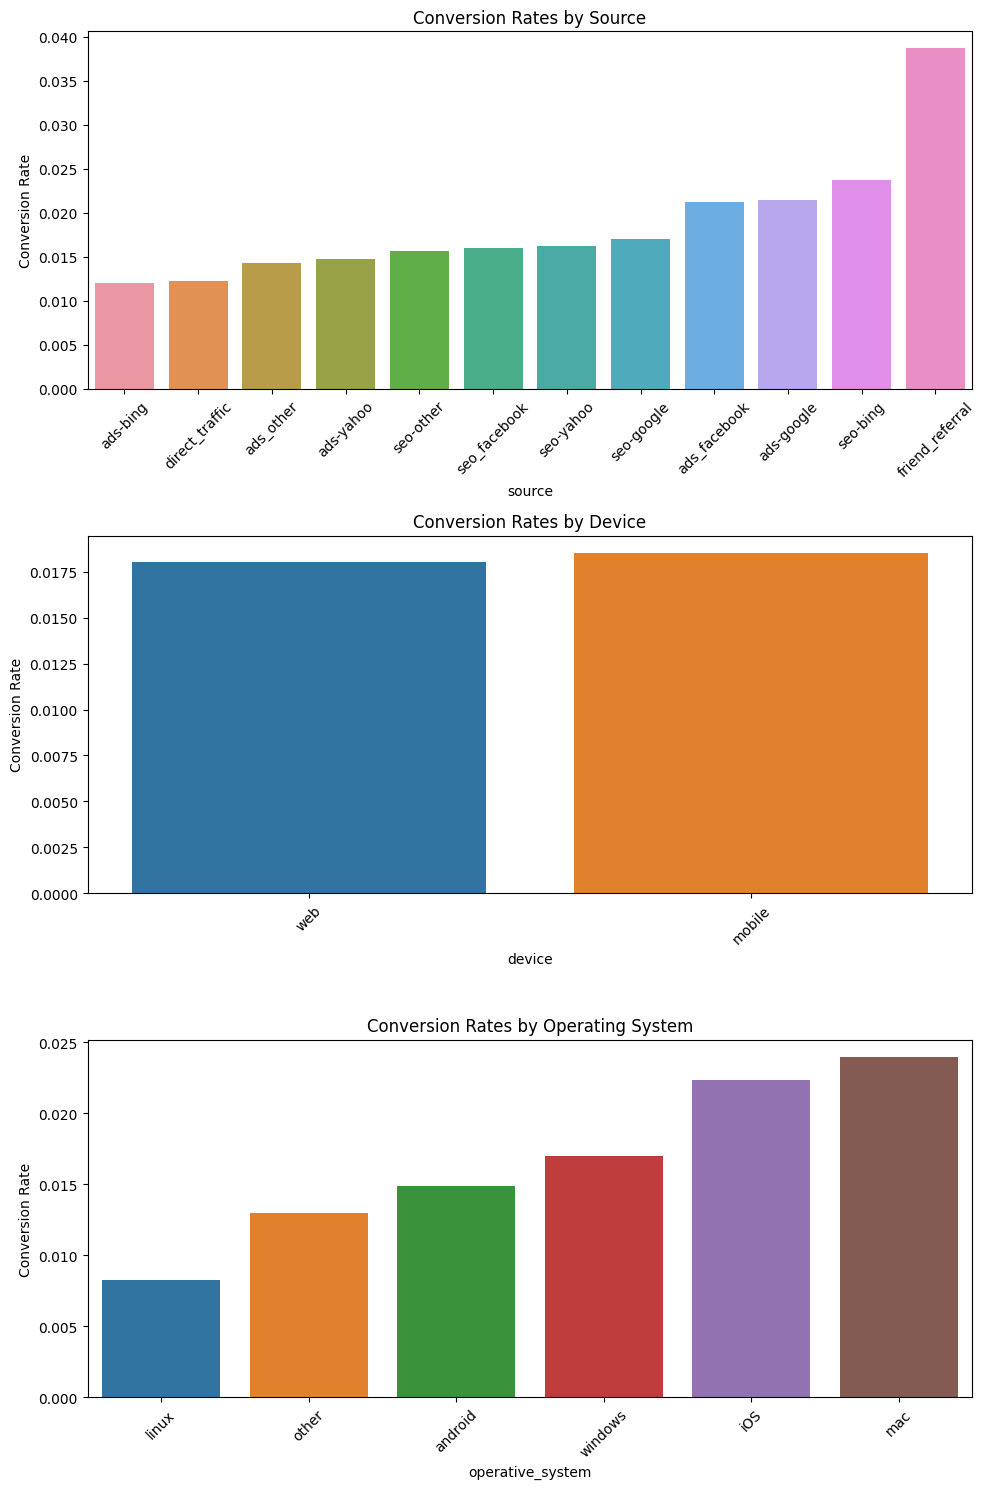

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

# Conversion rates segmented by source
source_conversion = data.groupby('source')['converted'].mean().sort_values()

# Conversion rates segmented by device
device_conversion = data.groupby('device')['converted'].mean().sort_values()

# Conversion rates segmented by operating system
os_conversion = data.groupby('operative_system')['converted'].mean().sort_values()

# Set up the matplotlib figure and axes
fig, axs = plt.subplots(3, 1, figsize=(10, 15))

# Generate bar plots
sns.barplot(x=source_conversion.index, y=source_conversion.values, ax=axs[0])
sns.barplot(x=device_conversion.index, y=device_conversion.values, ax=axs[1])
sns.barplot(x=os_conversion.index, y=os_conversion.values, ax=axs[2])

# Set axis labels
axs[0].set_title('Conversion Rates by Source')
axs[0].set_ylabel('Conversion Rate')
axs[1].set_title('Conversion Rates by Device')
axs[1].set_ylabel('Conversion Rate')
axs[2].set_title('Conversion Rates by Operating System')
axs[2].set_ylabel('Conversion Rate')

# Rotate x-axis labels for better visibility
for ax in axs:
    for label in ax.get_xticklabels():
        label.set_rotation(45)

# Adjust layout for better visibility
plt.tight_layout()


Here are some insights from the conversion rates segmented by different factors:

#### Source:
- Users coming from `friend_referral` have the highest conversion rate, while users from `seo_bing` have the lowest. This suggests that referrals are a very effective way to acquire users who are likely to convert.
- The conversion rates from different advertising platforms (`ads_facebook`, `ads_google`, etc.) vary, indicating that the effectiveness of these platforms is not the same.

#### Device:
- The conversion rate is slightly higher for web users than for mobile users.

#### Operating System:
- Users on Apple platforms (Mac and iOS) have higher conversion rates than users on other platforms (Windows and Android).
- The conversion rate is the lowest for users on Linux.

These findings suggest that the company could potentially increase the conversion rate by focusing more on referrals, optimizing for web and Apple users, and improving the user experience on Linux.

In [35]:
from statsmodels.stats.proportion import proportions_ztest

# Number of trials and successes for the two groups
nobs = data.groupby('price')['user_id'].count()
count = data.groupby('price')['converted'].sum()

# Perform the two-proportion z-test
stat, pval = proportions_ztest(count, nobs)

pval

2.2549214716059568e-18

The p-value from the two-proportion z-test is roughly $2.25 \times 10^{-18}$. This is considerably lower than the standard significance level of 0.05, indicating that the difference in conversion rates between the two prices is statistically significant.

Considering both the higher expected revenue per user at the \$59 price point, despite its lower conversion rate, and the statistically significant difference in conversion rates, I would advise the company to set the software's price at \$59.

Next, let's address the bonus question: Do you agree with the VP of Product that the test has been running for too long? After how many days would you have stopped the test?

To answer this, we need to perform a sequential analysis, where we check the p-value of the two-proportion z-test for each day of the test. We stop the test on the first day when the p-value is less than 0.05. Let's calculate this.

In [56]:
from dateutil.parser import parse

def custom_date_parser(x):
    try:
        return parse(x)
    except ValueError:
        return parse(x.replace('60', '59'))

# Convert the 'timestamp' column to datetime using the custom date parser
data['timestamp'] = data['timestamp'].apply(custom_date_parser)

# Calculate the minimum and maximum timestamp
min_timestamp = data['timestamp'].min()
max_timestamp = data['timestamp'].max()

# Initialize the day when the test should have been stopped
stop_day = None

# Perform the sequential analysis
for day in pd.date_range(start=min_timestamp, end=max_timestamp):
    # Filter the data up to the current day
    data_day = data[data['timestamp'] <= day]

    
    # Number of trials and successes for the two groups
    nobs_day = data_day.groupby('price')['user_id'].count()
    count_day = data_day.groupby('price')['converted'].sum()
    
    # Skip the day if there's only one group
    if len(nobs_day) < 2:
        continue
    # Perform the two-proportion z-test
    stat_day, pval_day = proportions_ztest(count_day, nobs_day)
    
    # Check if the p-value is less than 0.05
    if pval_day < 0.05:
        stop_day = day
        break

stop_day

Timestamp('2015-03-05 00:04:12')

The sequential analysis indicates that the test could have been stopped on 2015-03-05. This is the first day when the difference in conversion rates between the two prices was statistically significant.

Therefore, it appears that the VP of Product was correct in believing that the test had been running for too long. The company could have reached a conclusion much earlier and potentially started benefitting from the higher price sooner.

## Conculsion

In conclusion, the company should sell its software for \$59 based on the results of the test. The conversion rate is statistically significantly lower for this price, but the increased revenue per sale compensates for this, resulting in a higher expected revenue per user. Further, actionable insights to increase the conversion rate include focusing more on referrals, optimizing for web and Apple users, and improving the user experience on Linux. The test could have been stopped earlier, with the significant result reached on 2015-03-05.